In [168]:
#implementation
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [169]:
#dataset preparation
x,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)   

#print(x.shape[0])

In [54]:
#it is unsupervised learnng algorithms so we only make use of x values

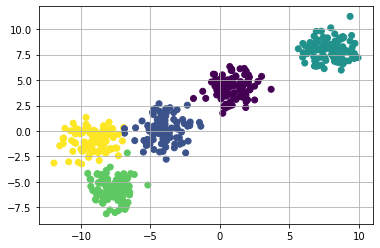

In [171]:
plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [172]:
k=5

color=['red','green','blue','black','pink']
clusters={}

for i in range(k):
    centre=10*(2*np.random.random((x.shape[1],))-1)      #x.shape=2 why???
    points=[]
    cluster={
        'centre':centre,
        'points' : points,
        'color' :color[i]
    }
    clusters[i]=cluster
    
print(clusters)


{0: {'centre': array([-9.30262225,  6.19635738]), 'points': [], 'color': 'red'}, 1: {'centre': array([ 5.47734113, -9.23564227]), 'points': [], 'color': 'green'}, 2: {'centre': array([-7.34564692, -4.97656409]), 'points': [], 'color': 'blue'}, 3: {'centre': array([-5.30202194, -4.44616473]), 'points': [], 'color': 'black'}, 4: {'centre': array([-9.61883954,  5.28914554]), 'points': [], 'color': 'pink'}}


In [173]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [174]:
# we have to run it over all training data cases
#assign every data point to one of the clusters
def assignPointToClusters(clusters):    #E-step --expectation
    for ix in range(x.shape[0]):
        dist=[]
        curr_x=x[ix]
    
        for i in range(k):
            d=distance(curr_x,clusters[i]['centre'])
            dist.append(d)
        
        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters):   #M-step    --maximisation  ->we update every cluster center according to the mean in it
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:      # if the cluster has some non zero points
            new_u=pts.mean(axis=0)
            clusters[kx]['centre']=new_u
            clusters[kx]['points']=[]     #----clear the list as center is changed so nearby points also changed
            

def plotClusters(clusters):
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        pts=np.array(clusters[kx]['points'])
        
        ##plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #plot the cluster center
        uk=clusters[kx]['centre']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
           
        

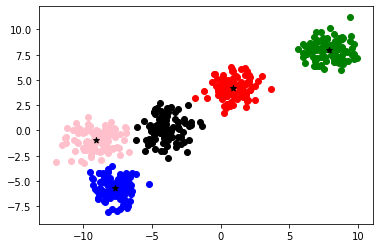

In [183]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)